<a href="https://colab.research.google.com/github/AndreMarcato/Planerg_2023/blob/main/Series_Sinteticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PySDDP

In [ ]:
from google.colab import drive, files
import os

#Montar o Google Drive no Colab com o nome gdrive

drive.mount('/content/gdrive')

# O comando abaixo mostra qual diretório você está trabalhando momento.
print( os.getcwd() )

Caminho_do_Arquivo = 'gdrive/My Drive/NewaveJuly2023/'
# O comando mostra o que está presente dentro da minha pasta GIF no meu drive, que está dentro do meu drive e em Doutorado. Mudar para o diretório que vocês criaram.
print( os.listdir(Caminho_do_Arquivo) )

Mounted at /content/gdrive
/content
['hidr.dat', 'TERM.DAT', 'CLAST.DAT', 'ARQUIVOS.DAT', 'GTMINPAT.DAT', 'MANUTT.DAT', 'EXPT.DAT', 'SHIST.DAT', 'CURVA.DAT', 'REE.DAT', 'format.tmp', 'MENSAG.TMP', 'EXPH.DAT', 'CONFHD.DAT', 'CONFT.DAT', 'DSVAGUA.DAT', 'CVAR.DAT', 'vazoes.dat', 'MODIF.DAT', 'HIDR.DAT', 'mensag.tmp', 'VAZOES.DAT', 'LOSS.DAT', 'ADTERM.DAT', 'AGRINT.DAT', 'GHMIN.DAT', 'PENALID.DAT', 'CASO.DAT', 'C_ADIC.DAT', 'POSTOS.DAT', 'postos.dat', 'RE.DAT', 'FORMAT.TMP', 'DGER.DAT', 'VAZPAST.DAT', 'PATAMAR.DAT', 'SISTEMA.DAT', 'gerado_123314', 'vazpast.dat', 'cvar.dat', 'ghmin.dat', 'ree.dat', 'ConvNomeArqsDados.log', 're.dat', 'pid.txt', 'alertainv.rel', 'consultafcf.rel', 'engthd.dat', 'vazinat.dat', 'vazthd.dat', 'engcont.dat', 'engfiobac.dat', 'engfiob.dat', 'planej.dat', 'engfio.dat', 'engnat.dat', 'LEITURA.TMP', 'x.log', 'energiab.dat', 'energiaf.dat', 'energiaxf.dat', 'energiaaf.dat', 'energiaaf002.dat', 'energiaxf002.dat', 'energiaaf003.dat', 'energiaxf003.dat', 'energiaaf004.d

In [ ]:
from PySDDP.Pen import Newave

PMOSET2023 = Newave(Caminho_do_Arquivo)

OK! Leitura do CASO.DAT realizada com sucesso.
OK! Leitura do ARQUIVOS.DAT realizada com sucesso.
OK! Leitura do DGER.DAT realizada com sucesso.
OK! Leitura do HIDR.DAT realizada com sucesso.
OK! Leitura do VAZOES.DAT realizada com sucesso.
OK! Leitura do MODIF.DAT realizada com sucesso. ( 99 Usinas Hidraulicas Modificadas )
OK! Leitura do EXPH.DAT realizada com sucesso. ( 2 Usinas Hidraulicas Expandidas )
OK! Leitura do CONFHD.DAT realizada com sucesso.
OK! Leitura do REE.DAT realizada com sucesso. ( 12 Reservatórios Equivalentes de Energia Foram Lidos )
OK! Leitura do SISTEMA.DAT realizada com sucesso.


In [ ]:
Usina = PMOSET2023.confhd.get('Furnas')

In [ ]:
print(Usina.keys())

dict_keys(['codigo', 'nome', 'posto', 'ree', 'vol_ini', 'status', 'modif', 'ano_i', 'ano_f', 'bdh', 'sist', 'empr', 'jusante', 'desvio', 'vol_min', 'vol_max', 'vol_vert', 'vol_min_desv', 'cota_min', 'cota_max', 'pol_cota_vol', 'pol_cota_area', 'coef_evap', 'num_conj_maq', 'maq_por_conj', 'pef_por_conj', 'cf_hbqt', 'cf_hbqt_2', 'cf_hbqt_3', 'cf_hbqt_4', 'cf_hbqt_5', 'cf_hbqg', 'cf_hbqg_2', 'cf_hbqg_3', 'cf_hbqg_4', 'cf_hbqg_5', 'cf_hbpt', 'cf_hbpt_2', 'cf_hbpt_3', 'cf_hbpt_4', 'cf_hbpt_5', 'alt_efet_conj', 'vaz_efet_conj', 'prod_esp', 'perda_hid', 'num_pol_vnj', 'pol_vaz_niv_jus', 'pol_vaz_niv_jus_2', 'pol_vaz_niv_jus_3', 'pol_vaz_niv_jus_4', 'pol_vaz_niv_jus_5', 'cota_ref_nivel_jus', 'cfmed', 'inf_canal_fuga', 'fator_carga_max', 'fator_carga_min', 'vaz_min', 'unid_base', 'tipo_turb', 'repres_conj', 'teifh', 'ip', 'tipo_perda', 'data', 'observ', 'vol_ref', 'tipo_reg', 'vazoes', 'vol_mint', 'vol_maxt', 'vol_minp', 'vaz_mint', 'cmont', 'cfugat', 'vol_util', 'pot_efet', 'vaz_efet', 'status

In [ ]:
import numpy as np
print(Usina['vazoes'])
print(np.shape(Usina['vazoes']))

[[1476 2964 2167 ...  662  667 1127]
 [1908 1898 1534 ...  521  573 1474]
 [1330  726  696 ...  411  295  692]
 ...
 [1139  986  835 ...  630  739  909]
 [2096 2078  843 ...  452  496 1269]
 [2997 2334 1585 ...    0    0    0]]
(93, 12)


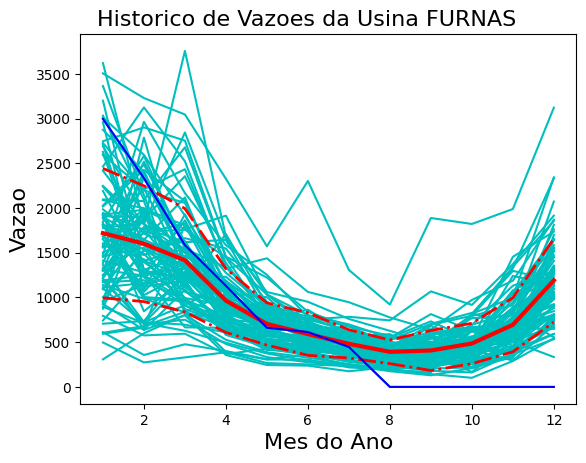

In [ ]:
PMOSET2023.confhd.plot_vaz(Usina)

In [ ]:
from cvxopt import matrix, solvers

recorte = Usina['vazoes'][0:91,4:7]
identidade = np.eye(91)

Aeq = np.concatenate((recorte, identidade), axis = 1)
Aeq = matrix(Aeq)
Beq = Usina['vazoes'][0:91,7:8]
Beq = matrix(Beq)
q = matrix(np.zeros(94))
P = 2*np.eye(94)
P[0][0] = 0
P[1][1] = 0
P[2][2] = 0
#P = matrix([P])
A = matrix([])
B = matrix([])

solvers.options['show_progress'] = False
abstol = 1e-9
reltol = 1e-9
print(np.shape(Beq))
sol = solvers.qp(P, q, A.T, B, Aeq.T, Beq, abstol=abstol, reltol=reltol)


In [ ]:
from cvxopt import matrix, solvers
import numpy as np

recorte = Usina['vazoes'][0:91, 4:7]
identidade = np.eye(91)

Aeq = np.concatenate((recorte, identidade), axis=1)
Aeq = matrix(Aeq)
Beq = Usina['vazoes'][0:91, 7:8]
Beq = matrix(Beq)
q = matrix(np.zeros((94, 1)))
P = 2 * np.eye(94)
P[0, 0] = 0
P[1, 1] = 0
P[2, 2] = 0
A = matrix(0.0, (0, 94))  # Empty matrix with zero rows and 94 columns
B = matrix(0.0, (0, 1))   # Empty matrix with zero rows and 1 column

solvers.options['show_progress'] = False
abstol = 1e-9
reltol = 1e-9
sol = solvers.qp(P, q, A, B, Aeq, Beq, abstol=abstol, reltol=reltol)

print(sol['x'])  # The solution vector

In [ ]:
print(Beq)

[ 469]
[ 393]
[ 325]
[ 204]
[ 468]
[ 352]
[ 364]
[ 481]
[ 398]
[ 408]
[ 334]
[ 419]
[ 495]
[ 347]
[ 349]
[ 430]
[ 548]
[ 419]
[ 385]
[ 496]
[ 476]
[ 406]
[ 303]
[ 273]
[ 232]
[ 430]
[ 465]
[ 480]
[ 465]
[ 508]
[ 571]
[ 472]
[ 347]
[ 258]
[ 777]
[ 486]
[ 546]
[ 367]
[ 313]
[ 347]
[ 218]
[ 442]
[ 380]
[ 405]
[ 261]
[ 744]
[ 363]
[ 372]
[ 552]
[ 487]
[ 469]
[ 627]
[ 921]
[ 482]
[ 476]
[ 590]
[ 434]
[ 384]
[ 476]
[ 405]
[ 425]
[ 448]
[ 435]
[ 352]
[ 311]
[ 389]
[ 437]
[ 360]
[ 278]
[ 380]
[ 217]
[ 308]
[ 271]
[ 386]
[ 416]
[ 283]
[ 354]
[ 433]
[ 525]
[ 301]
[ 388]
[ 340]
[ 363]
[ 200]
[ 189]
[ 284]
[ 176]
[ 223]
[ 229]
[ 235]
[ 194]



In [ ]:
from cvxopt import matrix, solvers

def despacho(Usina, VolInicic_Perc, ano, mes, Curva_Ref, Carga, CustoForaFaixa, Saida, FlipFlop, Imprimir = False):
  produtibilidade = Usina['ro_equiv'][0][0]  # Produtibilidade em Mwmed / (m3/s)
  vazao_afluente = Usina['vazoes'][ano-1931][mes-1]
  engolimento = Usina['engol_tempo'][0][0]
  vol_max = Usina['vol_max']
  vol_min = Usina['vol_min']
  potencia = Usina['potencia_tempo'][0][0]
  VolInic_hm3 = vol_min + (vol_max-vol_min)*VolInicic_Perc/100.

  # Cálculo da Produtibilidade no Ponto
  cota = 0.
  for i in range(5):
      cota += Usina['pol_cota_vol'][i]*(VolInic_hm3**i)
  queda = cota - Usina['cfmed']
  prod_ponto = queda*Usina['prod_esp']

  produtibilidade = prod_ponto

  if Imprimir:
    print(Usina.keys())
    print(f"O a produtibilidade de Furnas é: {produtibilidade} MWmed / (m3/s) ")
    print(f"A vazao afluente de Furnas é: {vazao_afluente} m3/s")
    print(f"O engolimento máximo de Furnas é {engolimento} m3/s")
    print(f"O volume máximo de Furnas é {vol_max} hm3")
    print(f"O volume mínimo de Furnas é {vol_min} hm3")
    print(f"Potencia Nominal de Furnas é {potencia} MWmed")

  CapacidadeInstalada = potencia/0.62
  CapacidadeTermica = CapacidadeInstalada - potencia
  UTE_A = {'Nome': 'GT_A',
          'Capac': CapacidadeTermica*0.6,
          'Custo': 250.0}
  UTE_B = {'Nome': 'GT_B',
          'Capac': CapacidadeTermica*0.4,
          'Custo': 450.0}
  #CustoDeficit = 4500.
  CustoDeficit = 11000.

  Faixa_Perc =  CurvaRef['Centro'][mes-1]

  Faixa_hm3 = vol_min + (vol_max-vol_min)*Faixa_Perc/100.

  FaixaInferior = Curva_Ref['LI'][mes-1]
  FaixaSuperior = Curva_Ref['LS'][mes-1]
  FaixaInferior = vol_min + (vol_max-vol_min)*FaixaInferior/100.
  FaixaSuperior = vol_min + (vol_max-vol_min)*FaixaSuperior/100.

  Centro = Faixa_hm3

  #
  # Regra do Alberto (Centro Móvel)
  #

  CENTRO_max = VolInic_hm3 + 2.592*vazao_afluente               # – 2.592*VAZÃO MÍNIMA
  CENTRO_min = VolInic_hm3 + 2.592*vazao_afluente - engolimento

  if Faixa_hm3 > CENTRO_max:
    Centro = CENTRO_max
  if Centro < CENTRO_min:
    Centro = CENTRO_min

  P = matrix([[2.0*CustoForaFaixa/(vol_max)**2, 0.0,  0.0,  0.0,  0.0,  0.0],
              [0.0, 0.0,  0.0,  0.0,  0.0,  0.0],
              [0.0, 0.0,  0.0,  0.0,  0.0,  0.0],
              [0.0, 0.0,  0.0,  0.0,  0.0,  0.0],
              [0.0, 0.0,  0.0,  0.0,  0.0,  0.0],
              [0.0, 0.0,  0.0,  0.0,  0.0,  0.0]])

  q = matrix([-2*CustoForaFaixa*Faixa_hm3/(vol_max**2), 0.0, CustoDeficit*1.50, UTE_A['Custo'], UTE_B['Custo'], CustoDeficit])
  q = matrix([-2*CustoForaFaixa*Centro/(vol_max**2), 0.0, CustoDeficit*1.50, UTE_A['Custo'], UTE_B['Custo'], CustoDeficit])

  Aeq = matrix([[1, 2.592, 2.592, 0, 0 , 0],
              [0, produtibilidade, 0.0, 1.0, 1.0, 1.0]])

  Beq = matrix( [VolInic_hm3+2.592*vazao_afluente, Carga] )

  A = matrix( [[-1., 0., 0., 0., 0., 0.],
              [0., -1., 0., 0., 0., 0.],
              [0., 0., -1., 0., 0., 0.],
              [0., 0., 0, -1., 0., 0.],
              [0., 0., 0., 0., -1., 0.],
              [0., 0., 0., 0., 0., -1.],
              [1., 0., 0., 0., 0., 0.],
              [0., 1., 0., 0., 0., 0.],
              [0., 0., 1., 0., 0., 0.],
              [0., 0., 0., 1., 0., 0.],
              [0., 0., 0., 0., 1., 0.],
              [0., 0., 0., 0., 0., 1.]])

  Travei = False

  if Saida == None or FlipFlop == False:
    B = matrix([-vol_min, 0, 0, 0, 0, 0,
                vol_max, 1.0*engolimento, 10*vol_max, UTE_A['Capac'], UTE_B['Capac'], 10*Carga])
  else:
    Travei = True
    B = matrix([-vol_min, 0, 0, -Saida[7], -Saida[8], 0,
                vol_max, 1.0*engolimento, 10*vol_max, Saida[7], Saida[8], 10*Carga])

  solvers.options['show_progress'] = False
  abstol = 1e-9
  reltol = 1e-9

  sol = solvers.qp(P, q, A.T, B, Aeq.T, Beq, abstol=abstol, reltol=reltol)

  # x[0] -> vf (volume final - hm3)
  # x[1] -> vt (vazao turbinada - m3/s)
  # x[2] -> vv (vazao vertida - m3/s)
  # x[3] -> termica A (MWmedio)
  # x[4] -> termica B (MWmedio)
  # x[5] -> deficit (MWmedio)

  # Testar colocação do Alberto (se ficar dentro da faixa, nao tem deficit nem vertimento)

  if FlipFlop == True:
    if sol["x"][0] > FaixaSuperior or sol["x"][0] < FaixaInferior or sol["x"][2] > 0.01 or sol["x"][5] > 0.01 :
        Travei = False
        B = matrix([-vol_min, 0, 0, 0, 0, 0,
                vol_max, 1.0*engolimento, 10*vol_max, UTE_A['Capac'], UTE_B['Capac'], 10*Carga])
        sol = solvers.qp(P, q, A.T, B, Aeq.T, Beq, abstol=abstol, reltol=reltol)

  if Travei == True and FlipFlop == True:
    print (f"Geração térmica travada em {mes}/{ano}")

  if sol['status'] == 'primal infeasible':
    print(ano,'/',mes)
    print(P)
    print(q.T)
    print(A.T)
    print(B)
    print (Aeq.T)
    print (Beq)

  geracao_termica_total = sol["x"][3] + sol["x"][4] + sol["x"][5]

  # Implementar o médio ponderado (Afonso/Calobró).

  CMO = 0.
  PLD = 0.
  if geracao_termica_total > 0.001 and geracao_termica_total <= UTE_A['Capac']:
    CMO = UTE_A['Custo']
    PLD = UTE_A['Custo']
  else:
    if geracao_termica_total > 0.01 and geracao_termica_total <= UTE_A['Capac'] + UTE_B['Capac']:
      CMO = UTE_B['Custo']
      PLD = (UTE_A['Custo']*sol["x"][3] + UTE_B['Custo']*sol["x"][4])/(sol["x"][3]+sol["x"][4])
    else:
      if sol["x"][5] > 0.1:
        CMO = CustoDeficit
        PLD = (UTE_A['Custo']*sol["x"][3] +
               UTE_B['Custo']*sol["x"][4] +
               CustoDeficit*sol["x"][5])/(sol["x"][3]+sol["x"][4]+sol["x"][5])
        # Complementar depois com o acréscimo do Calobró

  if Imprimir:
    # exibir o resultado da solução
    print(f'O Volume Final ótimo é: {sol["x"][0]:.2f} hm3. Volume Inicial {VolInic_hm3} hm3. Mínimo {vol_min:.2f} hm3. Máximo {vol_max:.2f} hm3. Meta {Faixa_hm3:.2f} hm3.' )
    print(f'O volume turbinado ótimo é {sol["x"][1]:.2f} m3/s. O engolimento máximo é {engolimento:.2f}')
    print(f'O volume vertido ótimo é {sol["x"][2]:.2f} m3/s.')
    print(f'A geração térmica ótimo da UTE_A é {sol["x"][3]:.2f} MWmed. A capacidade da térmica é {UTE_A["Capac"]}')
    print(f'A geração térmica ótimo da UTE_B é {sol["x"][4]:.2f} MWmed. A capacidade da térmica é {UTE_B["Capac"]}')
    print(f'O déficit ótimo é {sol["x"][5]:.2f} MWmed.')

    print(f'O valor da FOB é de {sol["primal objective"]+Faixa_hm3**2*CustoForaFaixa}')

    DespachonoTalo = UTE_A["Custo"]*UTE_A["Capac"]+UTE_B["Custo"]*UTE_B["Capac"]
    print(f'PEN1: {CustoForaFaixa}')
    print(f'DespachonoTalo: {DespachonoTalo}')
    print(f'Relação entre PEN1 e Despacho no Talo{CustoForaFaixa/DespachonoTalo}')

    print(f'O valor da FOB é de {sol["primal objective"]}')

    # Fechamento BH
    print ("Fechamento BH")
    print ('... Vol Inicial:', VolInic_hm3)
    print ('... Vaz Afluent:', vazao_afluente*2.592)
    print ('... Vaz Turbina:', sol['x'][1]*2.592)
    print ('... Vaz Vertida:', sol['x'][2]*2.592)
    print ('... Volf. Calc :', VolInic_hm3+vazao_afluente*2.592-sol['x'][1]*2.592-sol['x'][2]*2.592)
    print ('**************')
    print ("Fechamento AD")
    print('... Ger.Hidrau:', produtibilidade*sol['x'][1])
    print('... Ger. TermA:', sol['x'][3])
    print('... Ger. TermB:', sol['x'][4])
    print('... Deficit En:', sol['x'][5])
    print('... Carga Calc:', produtibilidade*sol['x'][1]+sol['x'][3]+sol['x'][4]+sol['x'][5])
    print ('**************')

  return [ CMO, FaixaInferior, FaixaSuperior, Faixa_hm3, sol["x"][0], sol["x"][5], sol["x"][2], sol["x"][3], sol["x"][4], PLD ]

In [ ]:
import numpy as np

Carga = 800.  # Colocar 1.2 * Garantia física
Imprimir = False
Usina = PMOSET2021.confhd.get('Furnas')
CurvaRef = {
    'LI': [ 45., 60., 65., 70., 65., 62., 58., 44., 39., 35., 30., 30.],
    'LS': [ 55., 70., 75., 80., 75., 72., 68., 54., 49., 45., 40., 50.],
    'Centro': [ 50., 65., 70., 75., 70., 67., 63., 49., 44., 40., 35., 45.]
}

vutil = Usina['vol_max'] - Usina['vol_min']
EARMAX_AO_QUAD = ((vutil/2.592)*Usina['ro_equiv'][0][0])**2
PEN1 = 9

#CustoForaFaixa = 600000000.   #PEN1
CustoForaFaixa = PEN1*EARMAX_AO_QUAD

cmo = list()
pld = list()
FaixaInferior = list()
FaixaSuperior = list()
Meta = list()
Volf = list()
Deficit = list()
Vertimento = list()
Data = list()
cmo_med = 0.
contador = 0.
custo_total = 0.

proximo_vol = 45.   # No primeiro, volume percentual
saida = None

for iano in np.arange(1931,2021,1):
  for imes in np.arange(1,13,1):
    #print(iano, '/', imes)
    saida = despacho(Usina, proximo_vol, iano, imes, CurvaRef, Carga, CustoForaFaixa, saida, FlipFlop = True, Imprimir = False)
    custo_total = custo_total + saida[5]*4500 + saida[7]*250 + saida[8]*450
    proximo_vol = 100.*(saida[4] - Usina['vol_min']) / (Usina['vol_max'] - Usina['vol_min'])
    print('GT1:', saida[7], 'Vol.Final:', proximo_vol)
    Data.append (str(iano)+'/'+str(imes))
    cmo.append(saida[0])
    contador += 1
    cmo_med += saida[0]
    FaixaInferior.append(saida[1])
    FaixaSuperior.append(saida[2])
    Meta.append(saida[3])
    Volf.append(saida[4])
    Deficit.append(saida[5])
    pld.append(saida[9])
    if saida[6] > 1:
      Vertimento.append(saida[6])
    else:
      Vertimento.append(0.)

print("CMO Médio:", cmo_med/contador)

# calculando o desvio padrão do array
std_dev = np.std(cmo)
mean = np.mean(cmo)
# calculando a volatilidade
volatility = (std_dev / mean) * 100
print("Volatilidade: {:.2f}%".format(volatility))
print(f"Custo Total: {custo_total}")

In [ ]:
import plotly.graph_objs as go

Volume = go.Figure()

Volume.add_trace(go.Scatter(x=Data, y=FaixaInferior, mode='lines', name='Limite Inferior'))
Volume.add_trace(go.Scatter(x=Data, y=FaixaSuperior, mode='lines', name='Limite Superior'))
Volume.add_trace(go.Scatter(x=Data, y=Meta, mode='lines', name='Alvo'))
Volume.add_trace(go.Scatter(x=Data, y=Volf, mode='lines', name='Volume Final'))

Volume.show()

CMO = go.Figure()
CMO.add_trace(go.Scatter(x=Data, y=cmo, mode='lines', name='Custo Marginal de Operação'))
CMO.show()

PLD = go.Figure()
PLD.add_trace(go.Scatter(x=Data, y=pld, mode='lines', name='PLD'))
PLD.show()


Vert = go.Figure()
Vert.add_trace(go.Scatter(x=Data, y=Vertimento, mode='lines', name='Vertimento'))
Vert.show()


In [ ]:
print(solvers.options)

{'show_progress': False}


In [ ]:
despacho(Usina, 40., 2021, 1, CurvaRef, Carga, CustoForaFaixa, Imprimir = True)

dict_keys(['codigo', 'nome', 'posto', 'ree', 'vol_ini', 'status', 'modif', 'ano_i', 'ano_f', 'bdh', 'sist', 'empr', 'jusante', 'desvio', 'vol_min', 'vol_max', 'vol_vert', 'vol_min_desv', 'cota_min', 'cota_max', 'pol_cota_vol', 'pol_cota_area', 'coef_evap', 'num_conj_maq', 'maq_por_conj', 'pef_por_conj', 'cf_hbqt', 'cf_hbqt_2', 'cf_hbqt_3', 'cf_hbqt_4', 'cf_hbqt_5', 'cf_hbqg', 'cf_hbqg_2', 'cf_hbqg_3', 'cf_hbqg_4', 'cf_hbqg_5', 'cf_hbpt', 'cf_hbpt_2', 'cf_hbpt_3', 'cf_hbpt_4', 'cf_hbpt_5', 'alt_efet_conj', 'vaz_efet_conj', 'prod_esp', 'perda_hid', 'num_pol_vnj', 'pol_vaz_niv_jus', 'pol_vaz_niv_jus_2', 'pol_vaz_niv_jus_3', 'pol_vaz_niv_jus_4', 'pol_vaz_niv_jus_5', 'cota_ref_nivel_jus', 'cfmed', 'inf_canal_fuga', 'fator_carga_max', 'fator_carga_min', 'vaz_min', 'unid_base', 'tipo_turb', 'repres_conj', 'teifh', 'ip', 'tipo_perda', 'data', 'observ', 'vol_ref', 'tipo_reg', 'vazoes', 'vol_mint', 'vol_maxt', 'vol_minp', 'vaz_mint', 'cmont', 'cfugat', 'vol_util', 'pot_efet', 'vaz_efet', 'status

[-4499.991902816671,
 13480.65,
 15202.35,
 14341.5,
 13743.953019049464,
 138.87487329239286,
 1.3326179824080459e-05]

In [ ]:
!pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.1 MB/s eta 0:00:00


In [ ]:
import gurobipy as gp

# Crie um modelo
model = gp.Model("exemplo")

# Crie variáveis de decisão inteiras
x = model.addVar(vtype=gp.GRB.INTEGER, name="x")
y = model.addVar(vtype=gp.GRB.INTEGER, name="y")

# Adicione uma restrição
model.addConstr(x + 2 * y <= 10, "c1")

# Defina a função objetivo
model.setObjective(3 * x + 2 * y, gp.GRB.MAXIMIZE)

# Resolva o problema
model.optimize()

# Imprima a solução
print("Solução encontrada:")
print("x = ", x.x)
print("y = ", y.x)
print("Função objetivo = ", model.objVal)

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 2 columns and 2 nonzeros
Model fingerprint: 0xb19def1c
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 30.0000000
Presolve removed 1 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 30 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+01, best bound 3.000000000000e+01, gap 0.0000%
Solução encontrada:
x =  1